<a href="https://colab.research.google.com/github/ishibyeva/ml_homework/blob/main/homework_task2_simple_NW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/ishibyeva/ml_homework/main/music_genres_train.csv'
data = pd.read_csv(url)

Немного вспомним характеристики датасета

In [3]:
data.shape

(17996, 17)

In [4]:
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [6]:
corr_mat = data.corr()
corr_mat

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,1.000000,0.167213,0.051538,0.005901,0.124915,0.016584,0.031664,-0.125410,-0.167661,-0.072298,0.054824,-0.006050,-0.031118,0.067062,0.161072
danceability,0.167213,1.000000,-0.093838,0.006702,0.059723,-0.067135,0.199042,0.009055,-0.200752,-0.109485,0.444548,-0.183527,-0.121624,0.137455,-0.097681
energy,0.051538,-0.093838,1.000000,0.015934,0.767869,-0.035880,0.125427,-0.745963,-0.180276,0.195634,0.222998,0.210224,0.245768,0.145281,0.217328
key,0.005901,0.006702,0.015934,1.000000,0.002660,-0.112452,0.001822,-0.009112,0.001411,0.015125,0.031744,0.013965,0.014547,0.006965,-0.007829
loudness,0.124915,0.059723,0.767869,0.002660,1.000000,-0.033650,0.096027,-0.612824,-0.343672,0.112022,0.181086,0.164272,0.172010,0.127775,0.177872
mode,0.016584,-0.067135,-0.035880,-0.112452,-0.033650,1.000000,-0.074609,0.024035,-0.026771,-0.001563,-0.002986,0.021211,-0.069307,-0.019989,-0.044740
speechiness,0.031664,0.199042,0.125427,0.001822,0.096027,-0.074609,1.000000,-0.086648,-0.067632,0.070406,0.053885,0.048948,0.005044,0.056237,-0.059349
acousticness,-0.125410,0.009055,-0.745963,-0.009112,-0.612824,0.024035,-0.086648,1.000000,0.174139,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936,-0.237138
instrumentalness,-0.167661,-0.200752,-0.180276,0.001411,-0.343672,-0.026771,-0.067632,0.174139,1.000000,-0.047189,-0.228144,-0.038586,-0.004551,-0.061745,-0.025343
liveness,-0.072298,-0.109485,0.195634,0.015125,0.112022,-0.001563,0.070406,-0.111393,-0.047189,1.000000,0.021076,0.033515,0.053885,0.021546,0.045309


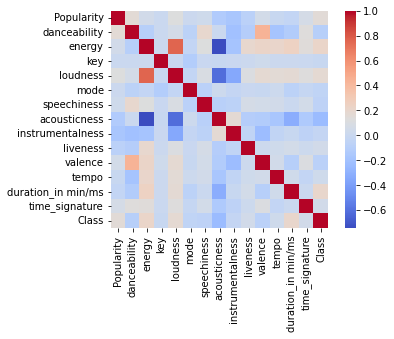

In [7]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [8]:
data.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [9]:
from sklearn import preprocessing
data["Artist Name"] = data["Artist Name"].astype(str)

number = preprocessing.LabelEncoder()
data["Artist Name"] = number.fit_transform(data["Artist Name"])

In [10]:
del data['Track Name']
del data['Artist Name']
data.shape

(17996, 15)

In [11]:
data.dtypes

Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

Теперь все признаки количественные. Ищем пропущенные значения и убираем их, как в задаче №1.

In [12]:
data.isna().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [13]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.499944,0.543433,0.662777,5.957768,-7.910660,0.636753,0.079707,0.247082,0.135326,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.218613,0.166268,0.235373,3.012689,4.049151,0.480949,0.083576,0.310632,0.274791,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.056600,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Нормализуем количественные признаки.
Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [14]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04
mean,-4.800006e-17,-7.138026e-15,6.342923e-15,2.075283e-16,3.280642e-15,1.729125e-16,-7.542912e-16,-2.911707e-15,4.642969e-14,2.065770e-15,9.562129e-15,-9.713113e-15,7.538316e-16,2.102462e-15,2.221433e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.526333e+00,-2.909952e+00,-2.815766e+00,-1.645629e+00,-7.913101e+00,-1.323951e+00,-6.844902e-01,-7.954154e-01,-4.924651e-01,-1.157389e+00,-1.948034e+00,-3.113343e+00,-1.792531e+00,-8.085991e+00,-2.088480e+00
25%,-6.678787e-01,-6.702005e-01,-6.533311e-01,-6.498409e-01,-4.018967e-01,-1.323951e+00,-5.373189e-01,-7.815727e-01,-4.913988e-01,-6.197404e-01,-7.877278e-01,-7.778612e-01,-3.072393e-01,2.100597e-01,-5.289403e-01
50%,-2.903512e-02,9.423202e-03,1.581456e-01,1.401791e-02,2.209500e-01,7.552728e-01,-3.865580e-01,-5.333692e-01,-4.782398e-01,-4.218906e-01,-2.168440e-02,-8.649516e-02,7.514606e-02,2.100597e-01,4.067838e-01
75%,6.678851e-01,6.950613e-01,8.379166e-01,6.778767e-01,6.721557e-01,7.552728e-01,3.940128e-02,6.017351e-01,-2.864943e-01,3.883515e-01,7.735020e-01,6.542089e-01,4.620586e-01,2.100597e-01,1.030600e+00
max,3.223259e+00,2.679803e+00,1.432716e+00,1.673665e+00,2.288297e+00,7.552728e-01,1.047301e+01,2.410949e+00,3.132099e+00,5.048814e+00,2.080772e+00,3.205540e+00,1.139791e+01,2.975410e+00,1.030600e+00


Делим на тестовую и обучающую выборки

In [15]:
from sklearn.model_selection import train_test_split
X = data_stand.drop(['Class'], axis=1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42, shuffle=True)
N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 

N_train, N_test

(10797, 7199)

##Нейронные сети:

In [16]:
from sklearn.neural_network import MLPClassifier



Здесь пришлось увеличить количество итераций из-за размера датасета

In [17]:
x_train.shape, x_test.shape

((10797, 14), (7199, 14))

In [18]:
%%time
test_err = []
train_err = []
for x in range(1, 100, 10):
    mlp_model = MLPClassifier(hidden_layer_sizes = (x, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

CPU times: user 3min 7s, sys: 1.5 s, total: 3min 9s
Wall time: 3min 14s


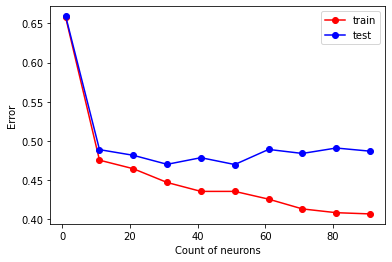

In [19]:
plt.plot(range(1, 100, 10), train_err, 'r-o', label = 'train')
plt.plot(range(1, 100, 10), test_err, 'b-o', label = 'test')
plt.xlabel('Count of neurons')
plt.ylabel('Error')
plt.legend()
pass

Видим, что минимальная ошибка где-то на 50 нейронах

In [20]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50, ), random_state = 42, max_iter = 10000)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print("Error on X_train with optimal alpha: ", np.mean(y_train != y_train_pred))
print("Error on X_test with optimal alpha: ", np.mean(y_test != y_test_pred))

Error on X_train with optimal alpha:  0.43215708067055664
Error on X_test with optimal alpha:  0.4804834004722878


Попробуем подобрать количество скрытых слоев для двух слоев

In [21]:
test_err = []
train_err = []
for x in range(1, 500, 50):
    mlp_model = MLPClassifier(hidden_layer_sizes = (x, 40), random_state = 42, max_iter = 10000)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

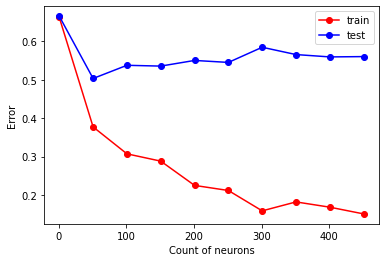

In [22]:
plt.plot(range(1, 500, 50), train_err, 'r-o', label = 'train')
plt.plot(range(1, 500, 50), test_err, 'b-o', label = 'test')
plt.xlabel('Count of neurons')
plt.ylabel('Error')
plt.legend()
pass

Меньше всего ошибка где-то на значении на 50 нейронах

In [23]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50, 40), random_state = 42, max_iter = 10000)
mlp_model.fit(x_train, y_train)

score1 = np.mean(y_train != mlp_model.predict(x_train))
score2 = np.mean(y_test  != mlp_model.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.38390293600074094
Ошибка на тестовой выборке:  0.5018752604528407


Ищем параметр альфа:

In [24]:
from sklearn.metrics import accuracy_score

test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in np.arange(0.0001, 0.05, 0.005):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (40, ), max_iter=10000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

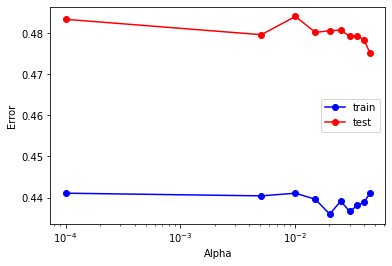

In [25]:
plt.semilogx(np.arange(0.0001, 0.05, 0.005), train_err, 'b-o', label = 'train')
plt.semilogx(np.arange(0.0001, 0.05, 0.005), test_err, 'r-o', label = 'test')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

Лучший параметр находится где-то на 0.01

In [26]:
mlp_model = MLPClassifier(hidden_layer_sizes = (40, ), alpha = 0.01, random_state = 42, max_iter = 10000)
mlp_model.fit(x_train, y_train)

score1 = np.mean(y_train != mlp_model.predict(x_train))
score2 = np.mean(y_test  != mlp_model.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.44012225618227285
Ошибка на тестовой выборке:  0.48145575774413113


Строим confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


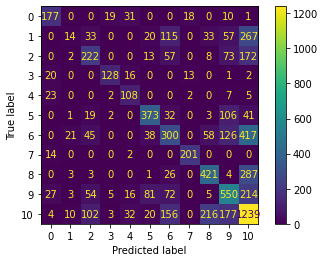

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, x_test, y_test) 
